In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Refer to the supplementary Manual about details for each line of the code

In [ ]:
import numpy as np
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [ ]:
import warnings

warnings.filterwarnings('ignore')

## Create the Convolutional Neural Network

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))


In [ ]:
model.add(MaxPooling2D(pool_size=2))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))


In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



#### Add a flatten layer

In [ ]:
model.add(Flatten())

### Summary of the CNN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

## Create an Artificial Neural Network on top of the CNN

Here ANN is Fully Connected Network (FCN)

In [ ]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [ ]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

### Summary of the overall Network (CNN+ANN)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

# Image Augmentation

SMOTE technique in tabular data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 # For image Augmentation

In [ ]:
# ImageDataGenerator() is used for preprocessing, augmentation etc. 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) 
# We don't want to do Augmentation in test data.


### Set the Directory

#### "YOUR FILE PATH" is the local path of your machine where you have set up your folders for training and test sets.

Loading the image data as Batchs (Here 32) using  train_datagen.flow_from_directory() method. These are called data loaders

In [ ]:
train_set = train_datagen.flow_from_directory (
    '/content/drive/MyDrive/Colab Notebooks/Project 16 - CNN/CNN_dogs_cats/Dogs _ cats images/training_set',\
    target_size=(64, 64),\
    batch_size=32,\
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Project 16 - CNN/CNN_dogs_cats/Dogs _ cats images/test_set',\
        target_size=(64, 64),\
        batch_size=32,\
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
# train_set & test_set are called data loaders

In [ ]:
len(train_set) # 2000/32

63

## Fit the Model



### steps_per_epoch = Total Number of images in the training set
### validation_steps = Total number of Images in the test set

in new version model.fit() will work instead of fit_generator()

In [ ]:
model.fit_generator(
        train_set,
        steps_per_epoch=len(train_set),
        epochs=20,
        validation_data=test_set,
        validation_steps=len(test_set))

Epoch 1/20
63/63 [==============================] - 17s 269ms/step - loss: 0.5444 - accuracy: 0.7180 - val_loss: 0.6011 - val_accuracy: 0.6880
Epoch 2/20
63/63 [==============================] - 16s 260ms/step - loss: 0.5239 - accuracy: 0.7520 - val_loss: 0.5662 - val_accuracy: 0.7090
Epoch 3/20
63/63 [==============================] - 16s 257ms/step - loss: 0.5123 - accuracy: 0.7440 - val_loss: 0.6458 - val_accuracy: 0.6700
Epoch 4/20
63/63 [==============================] - 16s 260ms/step - loss: 0.5083 - accuracy: 0.7575 - val_loss: 0.5643 - val_accuracy: 0.7200
Epoch 5/20
63/63 [==============================] - 17s 270ms/step - loss: 0.4941 - accuracy: 0.7655 - val_loss: 0.6607 - val_accuracy: 0.6630
Epoch 6/20
63/63 [==============================] - 17s 269ms/step - loss: 0.4871 - accuracy: 0.7750 - val_loss: 0.5744 - val_accuracy: 0.7150
Epoch 7/20
63/63 [==============================] - 17s 268ms/step - loss: 0.4910 - accuracy: 0.7710 - val_loss: 0.5726 - val_accuracy: 0.7160

## Predicting a New Image

In [ ]:
import numpy as np


In [ ]:
from keras.preprocessing import image

#### Target size is 64x64 as out CNN inputs the image size as 64x64

In [ ]:
new_image=image.load_img('/content/drive/MyDrive/Colab Notebooks/Project 16 - CNN/cat_temp.jpg',target_size=(64,64))

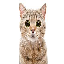

In [ ]:
new_image

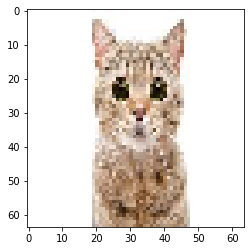

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(new_image)

In [ ]:
type(new_image)

PIL.Image.Image

### Change the image to  numpy array

In [ ]:
new_image=image.img_to_array(new_image)

In [ ]:
new_image.ndim

4

In [ ]:
type(new_image)

numpy.ndarray

### The input needs to be in 4 dimesnion. 4th Dim represents the batch size so add one more dimesion using the expand_dims function.

In [ ]:
new_image=np.expand_dims(new_image,axis=0)

In [ ]:
new_image.ndim

4

#### Predict the image and store it in a variable

In [ ]:
result=model.predict(new_image)

In [ ]:
result

array([[1.]], dtype=float32)

In [ ]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
result.ndim

2

In [ ]:
result[0][0]

1.0

In [ ]:
result=model.predict(new_image)
if result[0][0]==1:
    predict=print('This is a Dog')
else:
    predict=print('This is a Cat')
    
    


This is a Dog
